In [1]:
pip install pmdarima

     -------------------------------------- 613.3/613.3 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\Murtaza\Desktop\MaunaLoaDailyTemps.csv")
df=df.dropna()
print('Shape of data', df.shape)
df.head()

Shape of data (1821, 6)


,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


<Axes: >

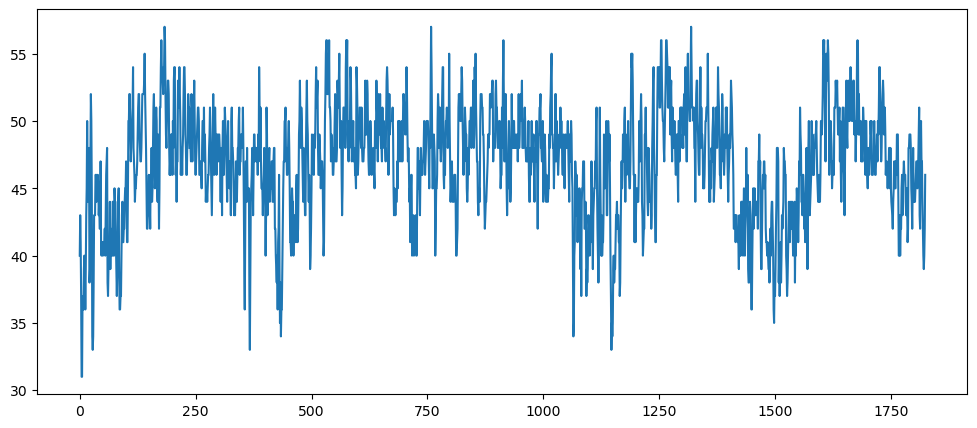

In [4]:
df['AvgTemp'].plot(figsize=(12,5)) 

In [8]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    print("1. ADF Statistic:", dftest[0])
    print("2. P-Value:", dftest[1])
    print("3. Num Lags Used:", dftest[2])
    print("4. Num Observations Used:", dftest[3])
    print("5. Critical Values:")
    
    for key, val in dftest[4].items():
        print(f"\t{key}: {val}")

In [9]:
ad_test(df['AvgTemp'])

1. ADF Statistic: -6.55468012506878
2. P-Value: 8.67593748019951e-09
3. Num Lags Used: 12
4. Num Observations Used: 1808
5. Critical Values:
	1%: -3.433972018026501
	5%: -2.8631399192826676
	10%: -2.5676217442756872


In [10]:
 from pmdarima import auto_arima
#Ignore harmless warnings
 import warnings
 warnings.filterwarnings("ignore")

In [11]:
 stepwise_fit = auto_arima(df['AvgTemp'],trace=True,
                           suppress_warnings=True)

 stepwise_fit.summary()
    

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.623, Time=1.94 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=1.31 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=1.80 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.333, Time=2.22 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.477, Time=2.12 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.191, Time=2.02 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8312.275, Time=2.53 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.529, Time=2.68 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.457, Time=2.97 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8306.039, Time=2.70 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.602
Date:                Wed, 05 Mar 2025   AIC                           8295.204
Time:                        14:27:13   BIC                           8339.261
Sample:                             0   HQIC                          8311.457
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2877      0.385      3.343      0.001       0.533       2.043
ar.L1          0.9723      0.008    117.243      0.000       0.956       0.989
ma.L1         -0.1199      0.024     -4.988      0.000      -0.167      -0.073
ma.L2         -0.2165      0.024     -8.869      0.000      -0.264      -0.169
ma.L3         -0.2039      0.024     -8.445      0.000      -0.251      -0.157
ma.L4         -0.1334      0.023     -5.811      0.000      -0.178      -0.088
ma.L5         -0.0482      0.025     -1.964      0.050      -0.096      -0.000
sigma2         5.5376      0.175     31.713      0.000       5.195       5.880
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                20.71
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
 print(df.shape)
 train=df.iloc[:30]
 test=df.iloc[-30:]
 print(train.shape,test.shape)

(1821, 6)
(30, 6) (30, 6)


In [16]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                   30
Model:                 ARIMA(1, 0, 5)   Log Likelihood                 -80.657
Date:                Wed, 05 Mar 2025   AIC                            177.313
Time:                        15:05:55   BIC                            188.523
Sample:                             0   HQIC                           180.899
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.4210      2.000     20.210      0.000      36.501      44.341
ar.L1         -0.9000      0.833     -1.081      0.280      -2.532       0.732
ma.L1          2.0064      0.927      2.164      0.030       0.189       3.824
ma.L2          1.5519      1.170      1.326      0.185      -0.741       3.845
ma.L3          0.6135      0.952      0.644      0.519      -1.253       2.480
ma.L4          0.1010      0.787      0.128      0.898      -1.442       1.644
ma.L5         -0.0521      0.451     -0.116      0.908      -0.936       0.832
sigma2        11.8609      4.999      2.373      0.018       2.063      21.659
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.70
Prob(Q):                              0.88   Prob(JB):                         0.70
Heteroskedasticity (H):               2.48   Skew:                            -0.33
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type='levels')
print(pred)
pred.index=df.index[start:end+1]
print(pred)

30    38.472369
31    39.360891
32    40.924289
33    39.941089
34    40.903597
35    39.986663
36    40.811923
37    40.069172
38    40.737664
39    40.136007
40    40.677511
41    40.190146
42    40.628784
43    40.234001
44    40.589314
45    40.269524
46    40.557342
47    40.298300
48    40.531443
49    40.321610
50    40.510464
51    40.340491
52    40.493471
53    40.355786
54    40.479705
55    40.368175
56    40.468554
57    40.378211
58    40.459522
59    40.386340
Name: predicted_mean, dtype: float64


<Axes: >

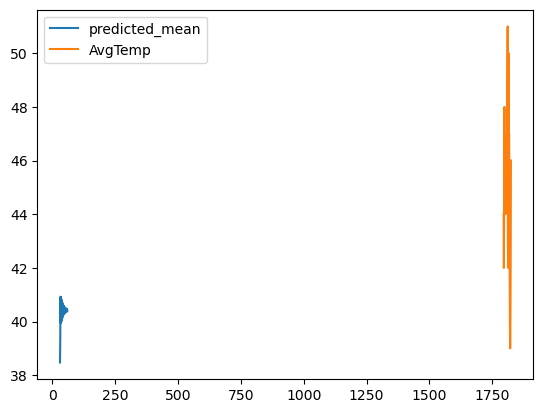

In [18]:
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [19]:
test['AvgTemp'].mean()

45.0

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

5.476133426530905


In [23]:
model2=ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
1820,12/26/2018,35.0,45.0,40.0,654,1752
1821,12/27/2018,33.0,44.0,39.0,655,1752
1822,12/28/2018,33.0,47.0,40.0,655,1753
1823,12/29/2018,36.0,47.0,42.0,655,1753
1824,12/30/2018,39.0,52.0,46.0,656,1754


In [25]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,type='levels').rename('ARIMA Predictions')
print(comp_pred)
pred.index=index_future_dates
print(comp_pred)

DatetimeIndex(['2018-12-30', '2018-12-31', '2019-01-01', '2019-01-02',
               '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14',
               '2019-01-15', '2019-01-16', '2019-01-17', '2019-01-18',
               '2019-01-19', '2019-01-20', '2019-01-21', '2019-01-22',
               '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-26',
               '2019-01-27', '2019-01-28', '2019-01-29'],
              dtype='datetime64[ns]', freq='D')


NameError: name 'comp_pred' is not defined

<Axes: >

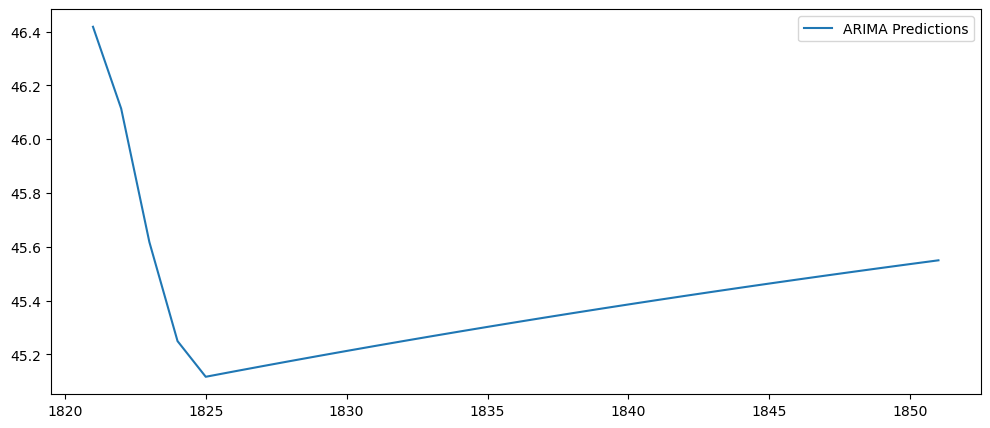

In [26]:
pred.plot(figsize=(12,5),legend=True)